In [1]:
#import the required packages
import requests
from bs4 import BeautifulSoup

import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

#Import the relevant libraries
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
#read data and examine first few rows
data = pd.read_csv ('/Users/nina/Downloads/9063/lyricsdataset/lyricsTest.csv')
# print(data.head())

In [3]:
lyricsList = data.Lyrics.tolist()
print(type(lyricsList))

<class 'list'>


The total number of words in the text is 551
The total number of words without punctuation is 482
The total number of words without punctuation and stopwords is 162


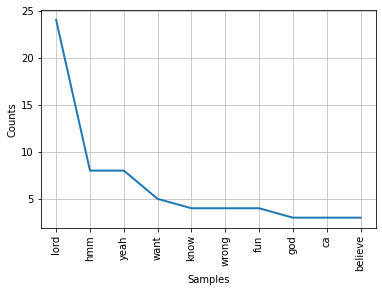

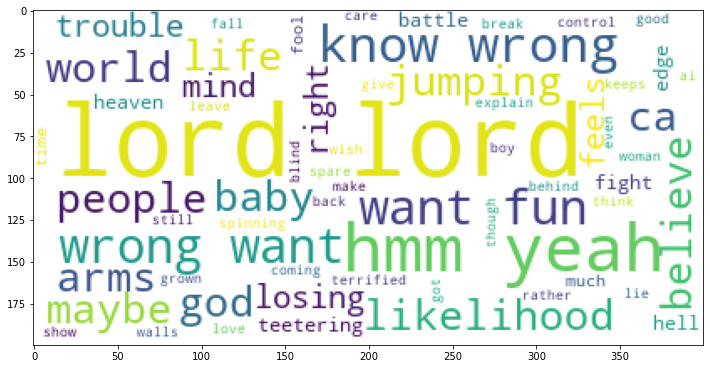

The total number of words in the text is 384
The total number of words without punctuation is 276
The total number of words without punctuation and stopwords is 74


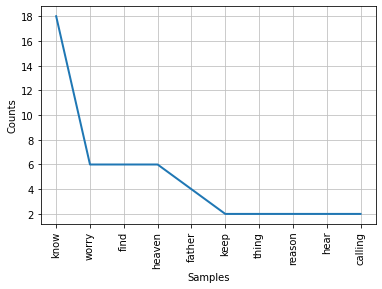

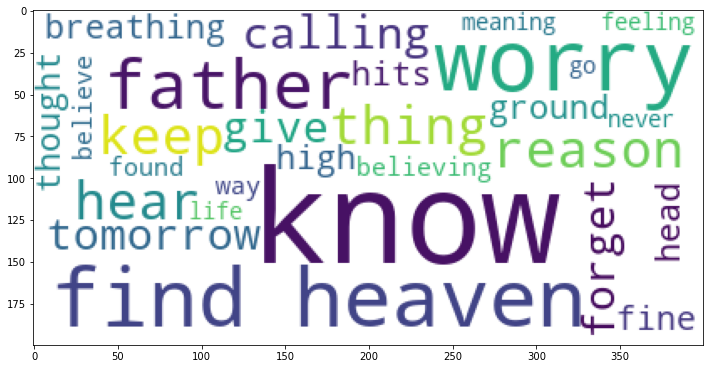

The total number of words in the text is 193
The total number of words without punctuation is 179
The total number of words without punctuation and stopwords is 90


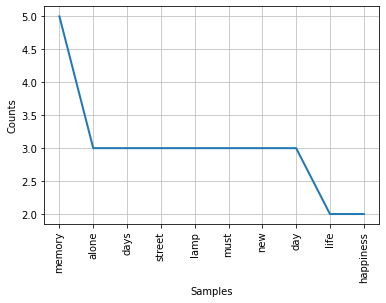

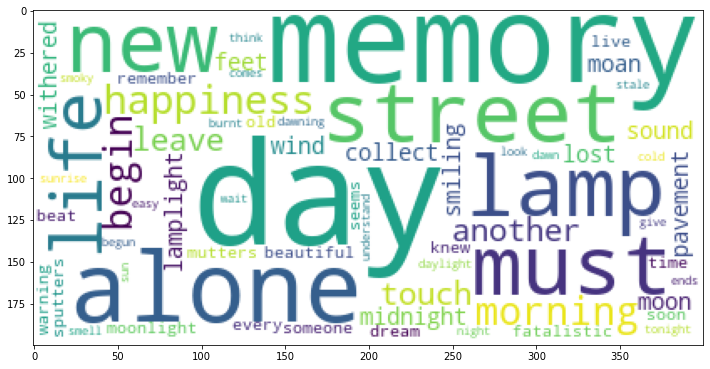

In [4]:
stopwords_list = stopwords.words("english")
stopwords_list.extend(stopwords.words("spanish"))
stopwords_list.extend(stopwords.words("german"))
stopwords_list.extend(["said","let","ah","yet","oh","hey"])

for x in lyricsList:
    words = word_tokenize(x)
    print(f"The total number of words in the text is {len(words)}")
    #create an empty list to store words
    words_no_punc = []
    #remove punctuations
    for word in words:
        if word.isalpha():
            words_no_punc.append(word.lower())
    #print number of words without punctuation
    print(f"The total number of words without punctuation is {len(words_no_punc)}")
    #create an empty list to store clean words
    clean_words = []
    #Iterate through the words_no_punc list and add non stopwords to the new clean_words list
    for word in words_no_punc:
        if word not in stopwords_list:
            clean_words.append(word)
    print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")
    #find the frequency of words
    fdist = FreqDist(clean_words)
    #Plot the 10 most common words
    fdist.plot(10)
    plt.show()
    #Convert word list to a single string
    clean_words_string = " ".join(clean_words)

    #generating the wordcloud
    wordcloud = WordCloud(background_color="white").generate(clean_words_string)
    #plot the wordcloud
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    #to remove the axis value
#     plt.axis("off")
    plt.show()

In [7]:
# !pip3 install transformers

In [6]:
# !pip3 install torch torchvision torchaudio 

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment') 
#a pre-trained NLP model 
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment') 


Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
#use of model and token example code 
token = tokenizer.encode("fuck this shit, I'm out!", return_tensors='pt')
print(tokenizer.decode(token[0]))
result = model(token)
#logits里数字越高，代表他是sentiment word中特negative的部分。
print(result)
#get the highest value result in logits with its position 
torch.argmax(result.logits)
print(int(torch.argmax(result.logits)))

In [ ]:
token2 = tokenizer.encode("love this world, game!", return_tensors='pt')
print(token2)
print(tokenizer.decode(token2[0]))
result2 = model(token2)
print(result2)
print(int(torch.argmax(result2.logits)))

#可以整一个lyrics在这里的对比，来看看这个到底好不好之类的